#Michał Trybulec
#eksploracyjna analiza danych z pliku insurance.csv


In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [163]:
# Ustawiam wielkość wykresów, bo domyślne sa dość małe 
sns.set(rc={'figure.figsize':(12,9)})


In [177]:
# Wczytuję dane z pliku insurance.csv
df = pd.read_csv('insurance.csv')


In [178]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [179]:
#sprawdzam typy danych, czy jest potrzeba zmiany danych tekstowych na liczbowe
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [180]:
# Na potrzeby sprawdzenia korelacji normalizuję dane 
# sex: 0 - female, 1 - male
df['sex_num'] = pd.factorize(df['sex'])[0]
# smoker: 0 - yes, 1 - no 
df['smoker_num'] = pd.factorize(df['smoker'])[0]
# region: 0-southwest	, 1-southeast, 2-northwest, 3-northeast
df['region_num'] = pd.factorize(df['region'])[0]




#Na poniższej heatmapie możemy zauważyć że największą korelację z wydatkami ma wiek, bmi, oraz palenie. Na tych kolumnach powinniśmy się skupić podczas analizy

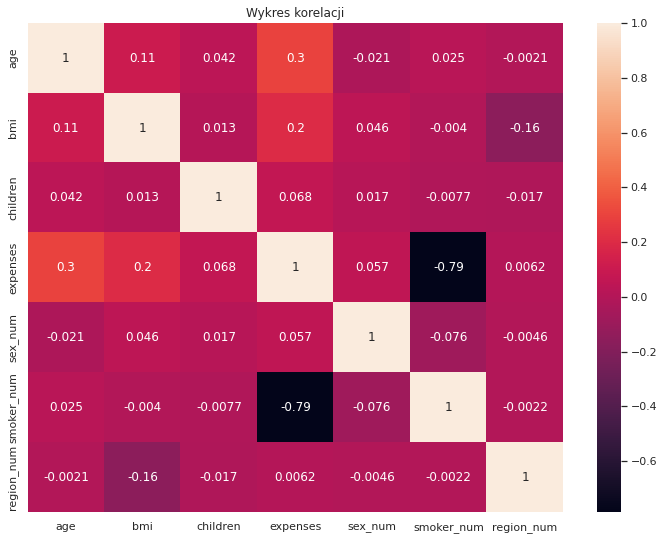

In [181]:
sns.heatmap(df.corr(),annot = True);
plt.title('Wykres korelacji')
plt.show()


#Rozkład wydatków - rozkład jest prawoskośny

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Wykres rozkładu wydatków')

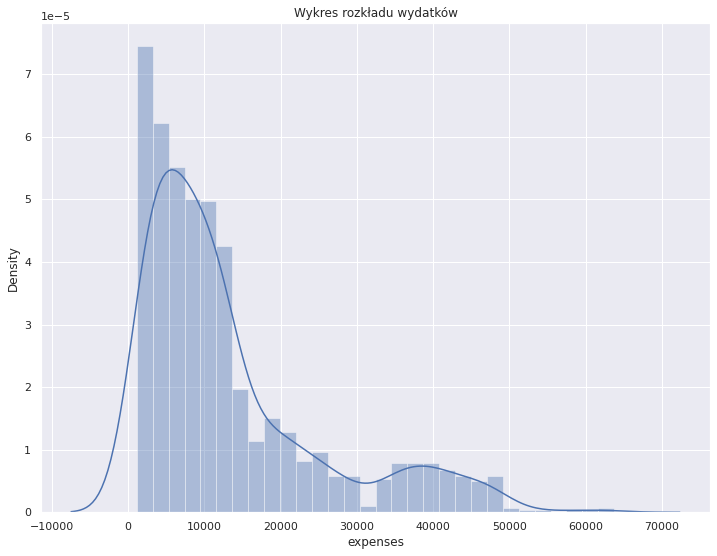

In [182]:
sns.distplot(df['expenses']).set_title('Wykres rozkładu wydatków')

#Jeżeli nie będziemy dzielić danych na palaczy i osoby niepalące, to możemy zauważyć, że wydatki na kobiety i mężczyżn mają niemal identyczną medianę.

Text(0.5, 1.0, 'Wykres pudełkowy wydatków i płci')

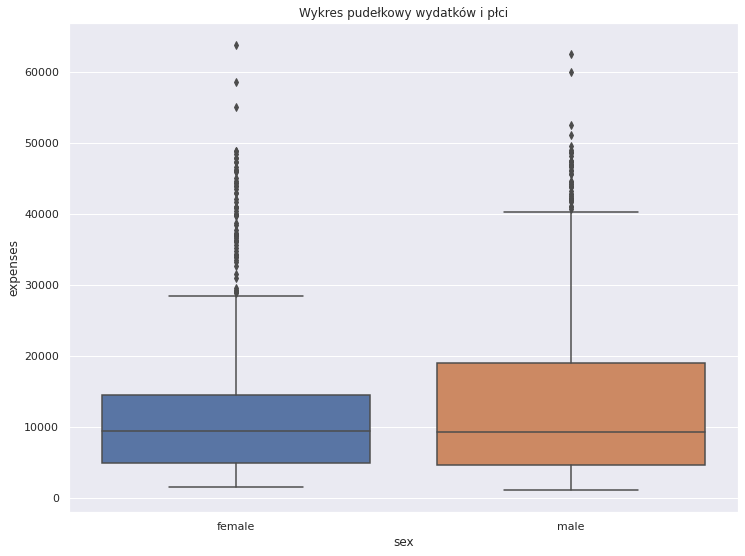

In [202]:
sns.boxplot(data=df, x='sex', y='expenses').set_title('Wykres pudełkowy wydatków i płci')

#Nie możemy wyciągnąć również jednoznaczych wnosków na temat korelacji liczby dzieci i wydatków

Text(0.5, 1.0, 'Wykres pudełkowy wydatków i liczby dzieci')

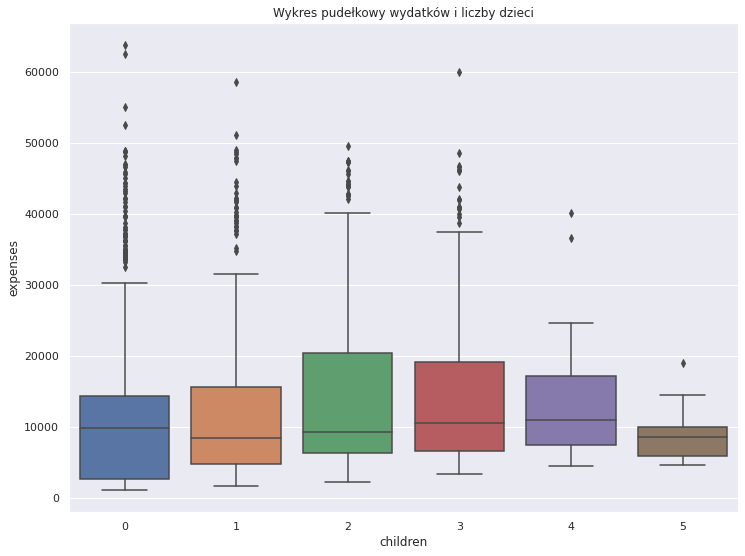

In [203]:
sns.boxplot(data=df, x='children', y='expenses').set_title('Wykres pudełkowy wydatków i liczby dzieci')

# Wykres punktowy, z którego możemy wywnioskować, że wydatki na palaczy są większe od wydatkó na niepalących i wydatki na palaczy rosną, wraz ze wzrostem ich BMI. 


Text(0.5, 1.0, 'Wykres punktowy wydatków i bmi')

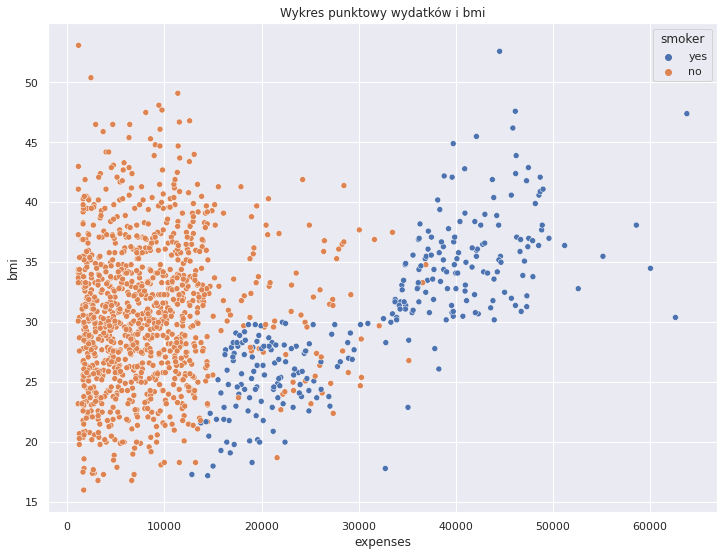

In [196]:
sns.scatterplot(data=df, x=df['expenses'], y=df['bmi'], hue=df['smoker']).set_title('Wykres punktowy wydatków i bmi')

#Wykres punktowy, z którego możemy wywnioskować, że wydatki rosną wraz z wiekiem, oraz że wydatki na palaczy są większe niż na osoby niepalące 



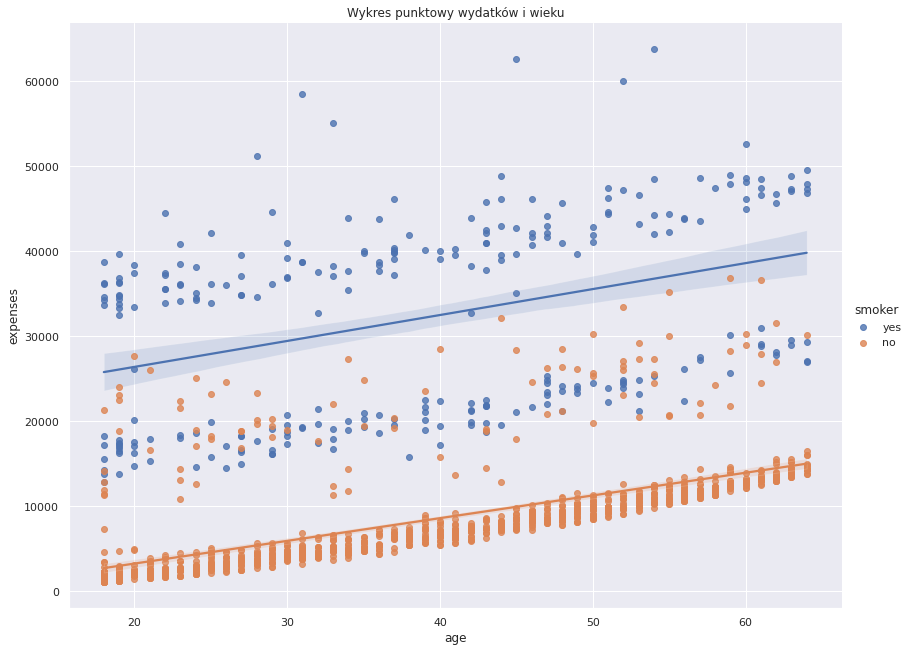

In [184]:
sns.lmplot(x="age", y="expenses", hue="smoker", data=df,  height=9, aspect=1.33)
plt.title('Wykres punktowy wydatków i wieku')
plt.show()


#Dwa wykresy wydatków na osoby palące oraz niepalący, porównywane są wydatki na kobiety oraz mężczyzn.
#Zauważamy że rozkład wydatków jest niemal identyczny dla obu płci.   

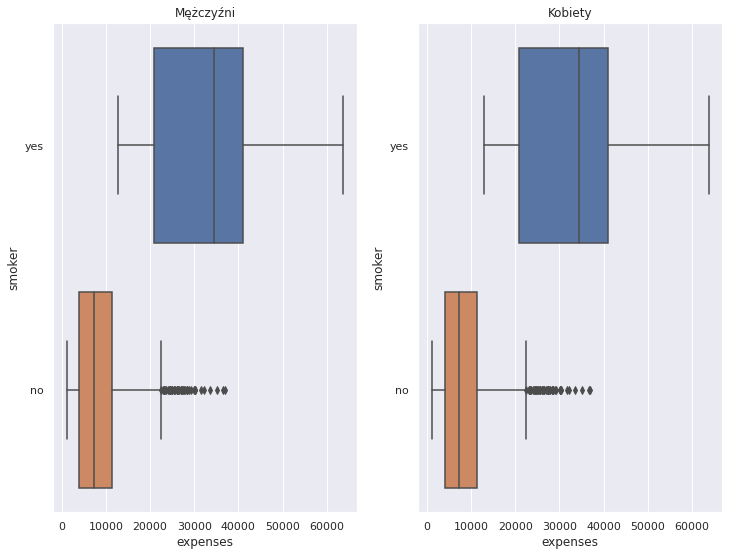

In [185]:
fig, ax = plt.subplots(1,2)
sns.boxplot(y=df['smoker'], x=df['expenses'], data =  df[(df.sex =='m')] , orient='h', ax=ax[0]).set_title('Mężczyźni')
sns.boxplot(y=df['smoker'], x=df['expenses'], data =  df[(df.sex =='f')] , orient='h', ax=ax[1]).set_title('Kobiety')
fig.show()


In [186]:
# Przypisuję kategorię na podstawie BMI 

list= [df]

for column in list:
    column.loc[column['bmi'] < 18.5, 'group_BMI'] = 'Niedowaga'
    column.loc[(column['bmi'] >= 18.5) & (column['bmi'] < 25), 'group_BMI'] = 'Norma'
    column.loc[(column['bmi'] >= 25) & (column['bmi'] < 30), 'group_BMI'] = 'Nadwaga'
    column.loc[column['bmi'] >= 30, 'group_BMI'] = 'Otyłość'
    
df.head()


,age,sex,bmi,children,smoker,region,expenses,sex_num,smoker_num,region_num,group_BMI
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,Nadwaga
1,18,male,33.8,1,no,southeast,1725.55,1,1,1,Otyłość
2,28,male,33.0,3,no,southeast,4449.46,1,1,1,Otyłość
3,33,male,22.7,0,no,northwest,21984.47,1,1,2,Norma
4,32,male,28.9,0,no,northwest,3866.86,1,1,2,Nadwaga


#Po grupowaniu danych na podstawie BMI można zauważyć, że otyłość wpływa na wartość wydatków, zarówno wśród palaczy jak i niepalących

Text(0.5, 1.0, 'Wykres kolumnowy wydatków i grupy BMI')

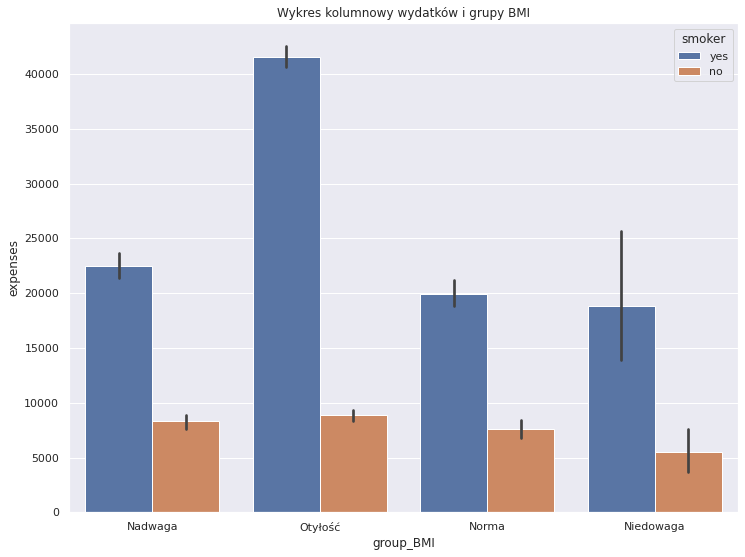

In [187]:
sns.barplot(x='group_BMI', y='expenses', hue='smoker', data=df).set_title('Wykres kolumnowy wydatków i grupy BMI')

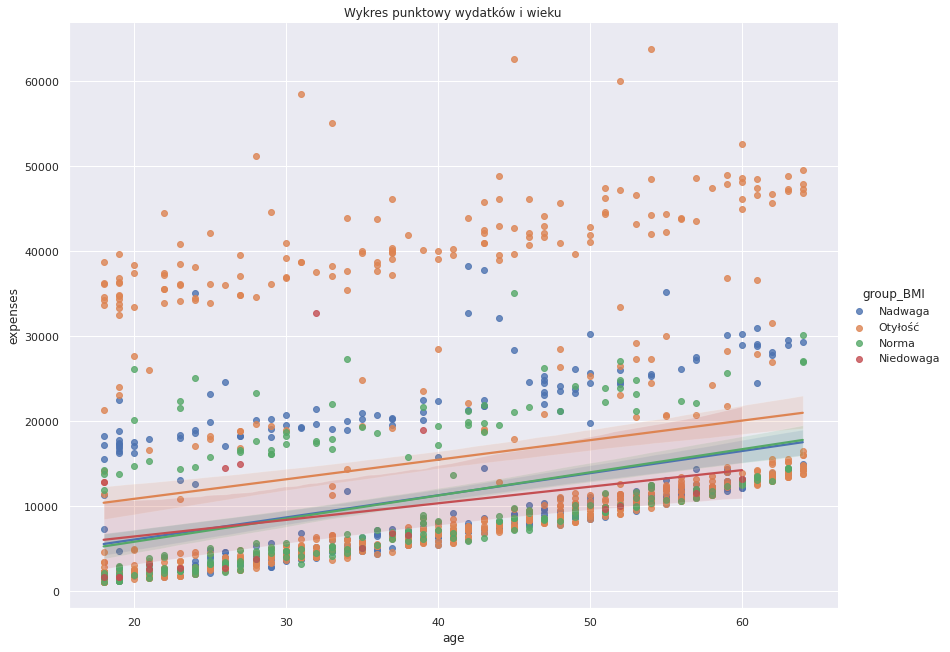

In [188]:
sns.lmplot(x='age', y='expenses', hue='group_BMI', data=df,  height=9, aspect=1.33)
plt.title('Wykres punktowy wydatków i wieku')
plt.show()
